<a href="https://colab.research.google.com/github/smaliyu/capstone-project/blob/main/final_version_Team_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team 1

## Name of Member:

In [53]:
# Import required libraries/code
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import requests
import os
import shutil


from torch import nn
from torchvision import transforms, datasets

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine

In [54]:
# TODO: Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Device is: {device}")

Device is: cuda


# Get Data

In [55]:

data_path = Path("data/")
kaggle_path = data_path / 'kaggle'
if kaggle_path.is_dir():
    print(f"{kaggle_path} directory exists.")
else:
    print(f"Did not find {kaggle_path} directory, creating one...")
    data_path.mkdir(parents=True, exist_ok=True)

    # Download kaggle API setting
    with open(data_path / "kaggle.json", "wb") as f:
        request = requests.get("https://raw.githubusercontent.com/smaliyu/capstone-project/main/kaggle.json")
        print("Downloading Kaggle API setting data...")
        f.write(request.content)

Did not find data/kaggle directory, creating one...


In [56]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/data'
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

os.rename("brain-tumor-mri-dataset.zip", "glioma_meningioma_notumor_pituitary.zip")

# Define the paths
original_file = "glioma_meningioma_notumor_pituitary.zip"
destination_folder = "/content/data"

# Move the file
shutil.move(original_file, destination_folder)

 98% 145M/149M [00:04<00:00, 44.9MB/s]
100% 149M/149M [00:04<00:00, 37.1MB/s]


'/content/data/glioma_meningioma_notumor_pituitary.zip'

In [57]:
import zipfile
image_path = data_path / "glioma_meningioma_notumor_pituitary"

with zipfile.ZipFile(data_path / "glioma_meningioma_notumor_pituitary.zip", "r") as zip_ref:
        print("Unzipping glioma, meningioma, notumor, pituitary data...")
        zip_ref.extractall(image_path)

Unzipping glioma, meningioma, notumor, pituitary data...


In [58]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")



In [59]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/glioma_meningioma_notumor_pituitary'.
There are 4 directories and 0 images in 'data/glioma_meningioma_notumor_pituitary/Testing'.
There are 0 directories and 300 images in 'data/glioma_meningioma_notumor_pituitary/Testing/glioma'.
There are 0 directories and 306 images in 'data/glioma_meningioma_notumor_pituitary/Testing/meningioma'.
There are 0 directories and 300 images in 'data/glioma_meningioma_notumor_pituitary/Testing/pituitary'.
There are 0 directories and 405 images in 'data/glioma_meningioma_notumor_pituitary/Testing/notumor'.
There are 4 directories and 0 images in 'data/glioma_meningioma_notumor_pituitary/Training'.
There are 0 directories and 1321 images in 'data/glioma_meningioma_notumor_pituitary/Training/glioma'.
There are 0 directories and 1339 images in 'data/glioma_meningioma_notumor_pituitary/Training/meningioma'.
There are 0 directories and 1457 images in 'data/glioma_meningioma_notumor_pituitary/Training/pituitary'.
The

In [60]:
# Setup train and testing paths
train_dir = image_path / "Training"
test_dir = image_path / "Testing"

train_dir, test_dir

(PosixPath('data/glioma_meningioma_notumor_pituitary/Training'),
 PosixPath('data/glioma_meningioma_notumor_pituitary/Testing'))

# Data Visalization

[PosixPath('data/glioma_meningioma_notumor_pituitary/Testing/glioma/Te-gl_0063.jpg'), PosixPath('data/glioma_meningioma_notumor_pituitary/Testing/glioma/Te-gl_0105.jpg'), PosixPath('data/glioma_meningioma_notumor_pituitary/Testing/glioma/Te-gl_0160.jpg'), PosixPath('data/glioma_meningioma_notumor_pituitary/Testing/glioma/Te-gl_0163.jpg'), PosixPath('data/glioma_meningioma_notumor_pituitary/Testing/glioma/Te-gl_0081.jpg'), PosixPath('data/glioma_meningioma_notumor_pituitary/Testing/glioma/Te-gl_0070.jpg'), PosixPath('data/glioma_meningioma_notumor_pituitary/Testing/glioma/Te-gl_0111.jpg'), PosixPath('data/glioma_meningioma_notumor_pituitary/Testing/glioma/Te-gl_0191.jpg'), PosixPath('data/glioma_meningioma_notumor_pituitary/Testing/glioma/Te-gl_0208.jpg'), PosixPath('data/glioma_meningioma_notumor_pituitary/Testing/glioma/Te-gl_0203.jpg'), PosixPath('data/glioma_meningioma_notumor_pituitary/Testing/glioma/Te-gl_0098.jpg'), PosixPath('data/glioma_meningioma_notumor_pituitary/Testing/glio

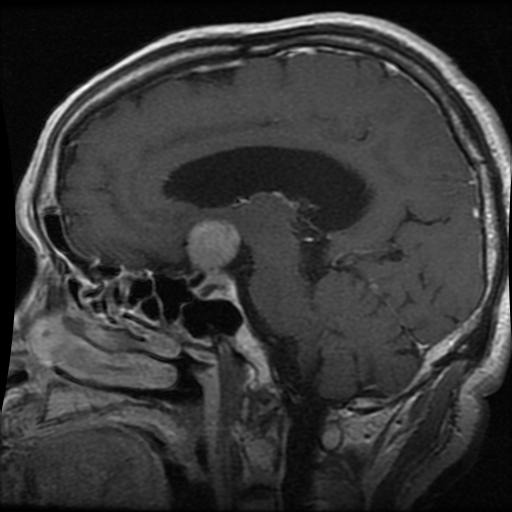

In [61]:
import random
from PIL import Image

# Set seed
random.seed(42) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))
print(image_path_list)

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

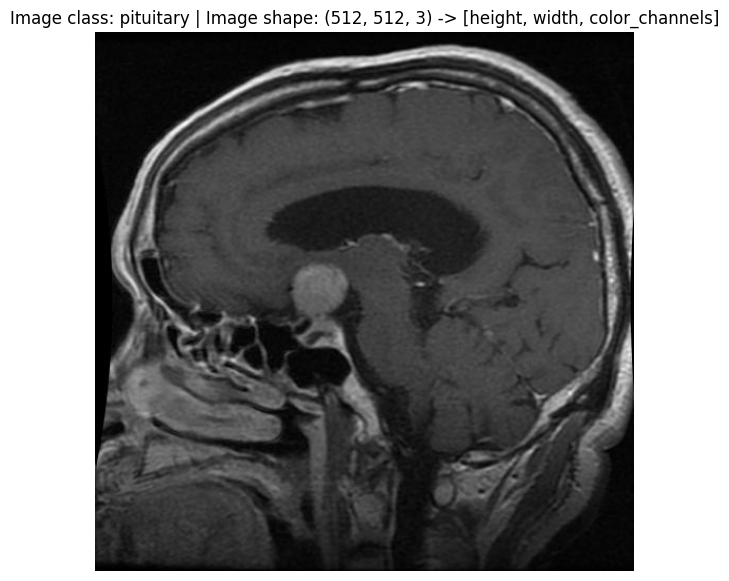

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

## Data Preparation

In [63]:
# Create a transforms pipeline
simple_transform = transforms.Compose([
    transforms.Resize((224, 224)), # 1. Reshape all images to 224x224 (though some models may require different sizes)
    transforms.ToTensor(), # 2. Turn image values to between 0 & 1
    transforms.Normalize(mean=[0.485, 0.456, 0.406], # 3. A mean of [0.485, 0.456, 0.406] (across each colour channel)
                         std=[0.229, 0.224, 0.225]) # 4. A standard deviation of [0.229, 0.224, 0.225] (across each colour channel),
])

In [64]:
# Create training and testing DataLoader's as well as get a list of class names
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                               test_dir=test_dir,
                                                                               transform=simple_transform, # resize, convert images to between 0 & 1 and normalize them
                                                                               batch_size=32) # set mini-batch size to 32

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x7fcfa2b97d60>,
 ['glioma', 'meningioma', 'notumor', 'pituitary'])

## Get and prepare a pretrained model

## implementation of efficientnet_b0

In [65]:
# Setup the model with pretrained weights and send it to the target device

from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights
from torchvision.models._api import WeightsEnum
from torch.hub import load_state_dict_from_url

def get_state_dict(self, *args, **kwargs):
    kwargs.pop("check_hash")
    return load_state_dict_from_url(self.url, *args, **kwargs)
WeightsEnum.get_state_dict = get_state_dict

efficientnet_b0(weights=EfficientNet_B0_Weights.IMAGENET1K_V1)
model_0 = efficientnet_b0(weights="DEFAULT")

In [66]:
model_0.to(device)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [67]:
# Freeze all base layers in the "features" section of the model (the feature extractor) by setting requires_grad=False
for param in model_0.features.parameters():
    param.requires_grad = False


In [68]:
# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)

# Recreate the classifier layer and seed it to the target device
model_0.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=1280,
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)

## Train model

In [69]:
# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.001)

In [70]:
# Set the random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Setup training and save the results
model_0_results = engine.train(model=model_0,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=10,
                       device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.5690 | train_acc: 0.8218 | test_loss: 0.4140 | test_acc: 0.8490
Epoch: 2 | train_loss: 0.3594 | train_acc: 0.8846 | test_loss: 0.3462 | test_acc: 0.8711
Epoch: 3 | train_loss: 0.3149 | train_acc: 0.8953 | test_loss: 0.3288 | test_acc: 0.8704
Epoch: 4 | train_loss: 0.2888 | train_acc: 0.9012 | test_loss: 0.3037 | test_acc: 0.8787
Epoch: 5 | train_loss: 0.2793 | train_acc: 0.9019 | test_loss: 0.2857 | test_acc: 0.8894
Epoch: 6 | train_loss: 0.2663 | train_acc: 0.9056 | test_loss: 0.2719 | test_acc: 0.9023
Epoch: 7 | train_loss: 0.2504 | train_acc: 0.9139 | test_loss: 0.2486 | test_acc: 0.9100
Epoch: 8 | train_loss: 0.2447 | train_acc: 0.9132 | test_loss: 0.2420 | test_acc: 0.9069
Epoch: 9 | train_loss: 0.2426 | train_acc: 0.9152 | test_loss: 0.2248 | test_acc: 0.9177
Epoch: 10 | train_loss: 0.2368 | train_acc: 0.9167 | test_loss: 0.2461 | test_acc: 0.9054
[INFO] Total training time: 309.958 seconds


## Make predictions on the entire test dataset with the model

In [71]:
from tqdm.auto import tqdm

# Make predictions on the entire test dataset
test_preds = []
model_0.eval()
with torch.inference_mode():
  # Loop through the batches in the test dataloader
  for X, y in tqdm(test_dataloader):
    X, y = X.to(device), y.to(device)
    # Pass the data through the model
    test_logits = model_0(X)

    # Convert the pred logits to pred probs
    pred_probs = torch.softmax(test_logits, dim=1)

    # Convert the pred probs into pred labels
    pred_labels = torch.argmax(pred_probs, dim=1)

    # Add the pred labels to test preds list
    test_preds.append(pred_labels)

# Concatenate the test preds and put them on the CPU
test_preds = torch.cat(test_preds).cpu()

  0%|          | 0/41 [00:00<?, ?it/s]

## Make a confusion matrix with the test preds and the truth labels

In [72]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.1


In [73]:
# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.23.1


In [74]:

# Get the truth labels for test dataset
test_truth = torch.cat([y for X, y in test_dataloader])
test_truth[:10]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

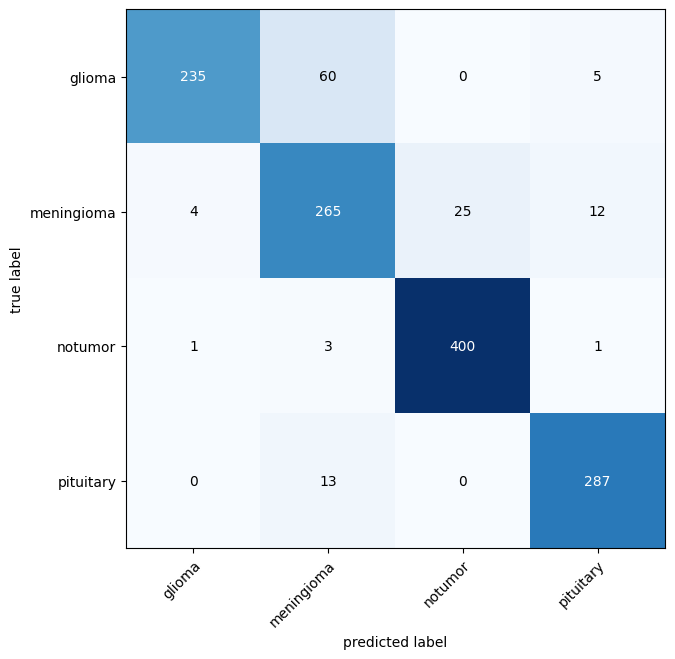

In [75]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix instance
#confmat = ConfusionMatrix(num_classes=len(class_names))
confmat = torchmetrics.ConfusionMatrix(task='multiclass', num_classes=4)
confmat_tensor = confmat(preds=test_preds, target=test_truth)
#confmat_tensor = confmat(preds=test_preds,
 #                        target=test_truth)

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names,
    figsize=(10, 7)
)

# Second Model: EfficientNet_B2


In [76]:
# Create a transform to transform the data
effnet_b2_transform = transforms.Compose([
  transforms.Resize((288, 288)), # effnet_b2 takes images of size 288, 288 - https://github.com/pytorch/vision/blob/d2bfd639e46e1c5dc3c177f889dc7750c8d137c7/references/classification/train.py#L92-L93
  transforms.ToTensor(),
  transforms.Normalize(mean=[0.485, 0.456, 0.406],
                       std=[0.229, 0.224, 0.225])
])

In [77]:
# Use 10% data sample for effnet_b2 to compare to model_0_results
train_dir, test_dir

(PosixPath('data/glioma_meningioma_notumor_pituitary/Training'),
 PosixPath('data/glioma_meningioma_notumor_pituitary/Testing'))

In [78]:
# Import the data
train_dataloader_effnet_b2, test_dataloader_effnet_b2, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                                                   test_dir=test_dir,
                                                                                                   transform=effnet_b2_transform,
                                                                                                   batch_size=32)

In [79]:

from torchvision.models import efficientnet_b2, EfficientNet_B2_Weights
from torchvision.models._api import WeightsEnum
from torch.hub import load_state_dict_from_url

def get_state_dict(self, *args, **kwargs):
    kwargs.pop("check_hash")
    return load_state_dict_from_url(self.url, *args, **kwargs)
WeightsEnum.get_state_dict = get_state_dict

efficientnet_b2(weights=EfficientNet_B2_Weights.IMAGENET1K_V1)
model_2 = efficientnet_b2(weights="DEFAULT").to(device)


In [80]:
# Freeze all base layers in the "features" section of the model (the feature extractor) by setting requires_grad=False
for param in model_2.features.parameters():
    param.requires_grad = False

In [81]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.001)

# Set the random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Setup training and save the results
model_2_results = engine.train(model=model_2,
                              train_dataloader=train_dataloader_effnet_b2,
                              test_dataloader=test_dataloader_effnet_b2,
                              optimizer=optimizer,
                              loss_fn=loss_fn,
                              epochs=10,
                              device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.4015 | train_acc: 0.6334 | test_loss: 0.6811 | test_acc: 0.8155
Epoch: 2 | train_loss: 0.5035 | train_acc: 0.8504 | test_loss: 0.5012 | test_acc: 0.8468
Epoch: 3 | train_loss: 0.3973 | train_acc: 0.8731 | test_loss: 0.4216 | test_acc: 0.8605
Epoch: 4 | train_loss: 0.3640 | train_acc: 0.8747 | test_loss: 0.3597 | test_acc: 0.8750
Epoch: 5 | train_loss: 0.3307 | train_acc: 0.8876 | test_loss: 0.3440 | test_acc: 0.8819
Epoch: 6 | train_loss: 0.3072 | train_acc: 0.8918 | test_loss: 0.3152 | test_acc: 0.8910
Epoch: 7 | train_loss: 0.2935 | train_acc: 0.9001 | test_loss: 0.3135 | test_acc: 0.8819
Epoch: 8 | train_loss: 0.2841 | train_acc: 0.8973 | test_loss: 0.2971 | test_acc: 0.8956
Epoch: 9 | train_loss: 0.2804 | train_acc: 0.8977 | test_loss: 0.2700 | test_acc: 0.9009
Epoch: 10 | train_loss: 0.2763 | train_acc: 0.9007 | test_loss: 0.2685 | test_acc: 0.8986
[INFO] Total training time: 427.855 seconds


## Make predictions on the entire test dataset with the model

In [82]:
from tqdm.auto import tqdm

# Make predictions on the entire test dataset
test_preds = []
model_0.eval()
with torch.inference_mode():
  # Loop through the batches in the test dataloader
  for X, y in tqdm(test_dataloader):
    X, y = X.to(device), y.to(device)
    # Pass the data through the model
    test_logits = model_0(X)

    # Convert the pred logits to pred probs
    pred_probs = torch.softmax(test_logits, dim=1)

    # Convert the pred probs into pred labels
    pred_labels = torch.argmax(pred_probs, dim=1)

    # Add the pred labels to test preds list
    test_preds.append(pred_labels)

# Concatenate the test preds and put them on the CPU
test_preds = torch.cat(test_preds).cpu()

  0%|          | 0/41 [00:00<?, ?it/s]

In [83]:
# Get the truth labels for test dataset
test_truth = torch.cat([y for X, y in test_dataloader])
test_truth[:10]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Make a confusion matrix with the test preds and the truth labels

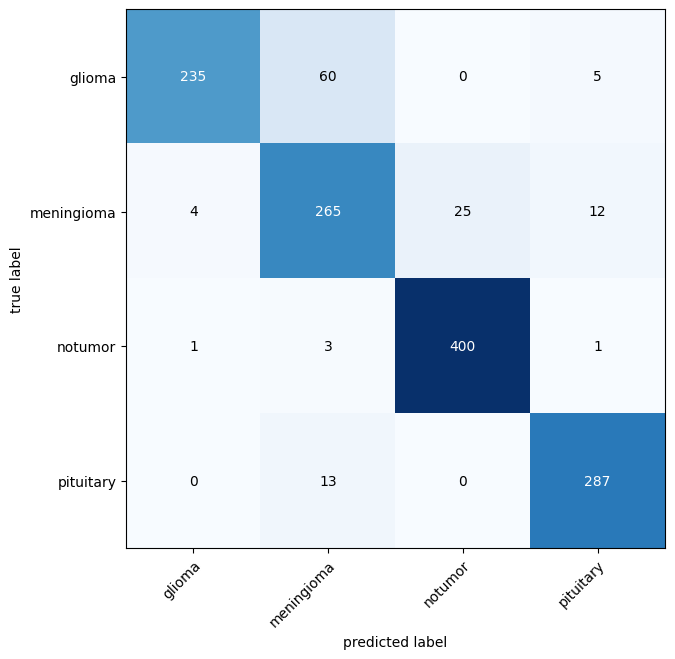

In [84]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix instance
#confmat = ConfusionMatrix(num_classes=len(class_names))
confmat = torchmetrics.ConfusionMatrix(task='multiclass', num_classes=4)
confmat_tensor = confmat(preds=test_preds, target=test_truth)
#confmat_tensor = confmat(preds=test_preds,
 #                        target=test_truth)

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names,
    figsize=(10, 7)
)

# Third Model: MobileNet

In [85]:
# Setup the model with pretrained weights
mobilenet_model = torchvision.models.mobilenet_v2(weights='MobileNet_V2_Weights.DEFAULT')


In [86]:
mobilenet_model.to(device)

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [87]:
# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)

# Recreate the classifier layer and seed it to the target device
mobilenet_model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=1280,
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)

In [88]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mobilenet_model.parameters(), lr=0.001)

In [89]:
# Set the random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Setup training and save the results
mobilenet_model_results = engine.train(model=mobilenet_model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=10,
                       device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd18512b910>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd18512b910>

Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    AssertionErrorself._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/proce

Epoch: 1 | train_loss: 0.2539 | train_acc: 0.9152 | test_loss: 0.1346 | test_acc: 0.9581
Epoch: 2 | train_loss: 0.1199 | train_acc: 0.9602 | test_loss: 0.1621 | test_acc: 0.9420
Epoch: 3 | train_loss: 0.0708 | train_acc: 0.9787 | test_loss: 0.0852 | test_acc: 0.9748
Epoch: 4 | train_loss: 0.0678 | train_acc: 0.9784 | test_loss: 0.1057 | test_acc: 0.9664
Epoch: 5 | train_loss: 0.0508 | train_acc: 0.9817 | test_loss: 0.0520 | test_acc: 0.9832
Epoch: 6 | train_loss: 0.0545 | train_acc: 0.9824 | test_loss: 0.0897 | test_acc: 0.9680
Epoch: 7 | train_loss: 0.0281 | train_acc: 0.9911 | test_loss: 0.0674 | test_acc: 0.9825
Epoch: 8 | train_loss: 0.0368 | train_acc: 0.9871 | test_loss: 0.0492 | test_acc: 0.9817
Epoch: 9 | train_loss: 0.0431 | train_acc: 0.9862 | test_loss: 0.0462 | test_acc: 0.9855
Epoch: 10 | train_loss: 0.0263 | train_acc: 0.9923 | test_loss: 0.1065 | test_acc: 0.9695
[INFO] Total training time: 358.493 seconds


## Make predictions on the entire test dataset with the model

In [90]:
from tqdm.auto import tqdm

# Make predictions on the entire test dataset
test_preds = []
mobilenet_model.eval()
with torch.inference_mode():
  # Loop through the batches in the test dataloader
  for X, y in tqdm(test_dataloader):
    X, y = X.to(device), y.to(device)
    # Pass the data through the model
    test_logits = mobilenet_model(X)

    # Convert the pred logits to pred probs
    pred_probs = torch.softmax(test_logits, dim=1)

    # Convert the pred probs into pred labels
    pred_labels = torch.argmax(pred_probs, dim=1)

    # Add the pred labels to test preds list
    test_preds.append(pred_labels)

# Concatenate the test preds and put them on the CPU
test_preds = torch.cat(test_preds).cpu()
test_preds

  0%|          | 0/41 [00:00<?, ?it/s]

tensor([0, 0, 0,  ..., 3, 3, 3])

## Make a confusion matrix with the test preds and the truth labels

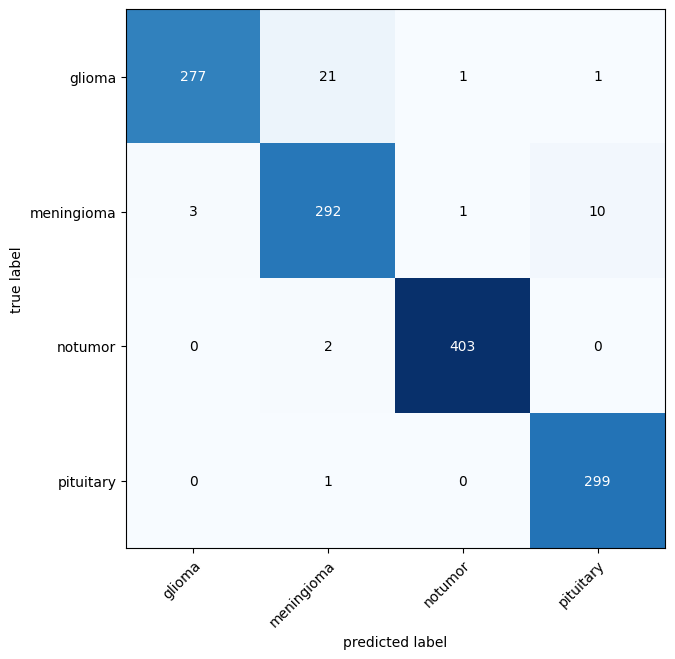

In [91]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix instance
#confmat = ConfusionMatrix(num_classes=len(class_names))
confmat = torchmetrics.ConfusionMatrix(task='multiclass', num_classes=4)
confmat_tensor = confmat(preds=test_preds, target=test_truth)
#confmat_tensor = confmat(preds=test_preds,
 #                        target=test_truth)

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names,
    figsize=(10, 7)
)